# ASSIGNMENT-2 :  LOGISTIC REGRSSION ON TITANIC DATASET

### READING THE DATASET

#### Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import math


In [3]:
train = pd.read_excel('train.xlsx')
test  = pd.read_excel('test.xlsx')

### ANALYZING THE DATASET

#### Shape and dimensions

In [4]:
print('\nTRAIN DIM:', train.shape, '\n\n', 'TEST DIM', test.shape)


TRAIN DIM: (891, 12) 

 TEST DIM (418, 11)


#### Head

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Information

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<Axes: xlabel='Survived', ylabel='count'>

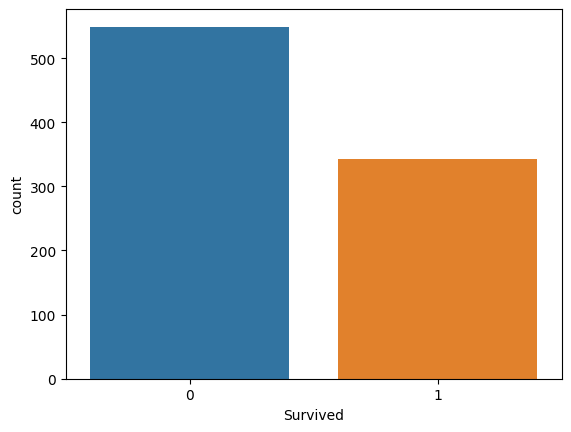

In [9]:
sns.countplot (x ="Survived", data = train)

<Axes: xlabel='Survived', ylabel='count'>

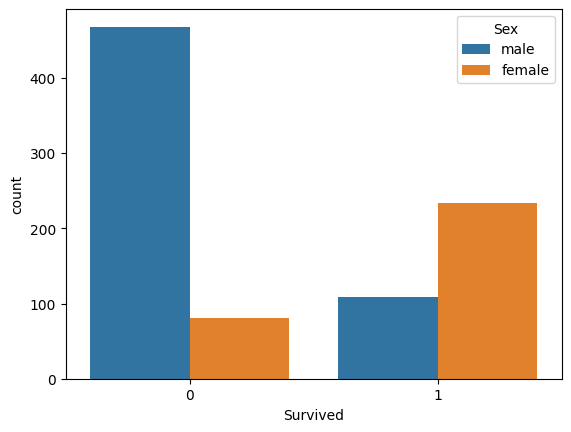

In [10]:
sns.countplot (x ="Survived", hue = "Sex", data = train
              )

### EXPLORATORY DATA ANALYSIS

In [11]:
print("Survival Status: \n",train['Survived'].value_counts())
print("Passenger Class: ",*train['Pclass'].unique())
print("Embarked City: ",*train['Embarked'].unique())
print("# of parents / children aboard the Titanic: ",*train['Parch'].unique())
df = print("# of siblings / spouses aboard the Titanic: ",*train['SibSp'].unique())

Survival Status: 
 Survived
0    549
1    342
Name: count, dtype: int64
Passenger Class:  3 1 2
Embarked City:  S C Q nan
# of parents / children aboard the Titanic:  0 1 2 5 3 4 6
# of siblings / spouses aboard the Titanic:  1 0 3 4 2 5 8


#### DATA CLEANING

In [20]:
# New dataframe with essential data is generated
df = pd.read_excel('train.xlsx')
unwanted_cols = ['Name','Sex', 'Cabin','Ticket','Embarked']
df_new = df.copy()
df_new = df.drop(unwanted_cols,axis =1)
df_new

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [21]:
# Filling the missing data with mean
df_new = df_new.fillna(df_new.mean())

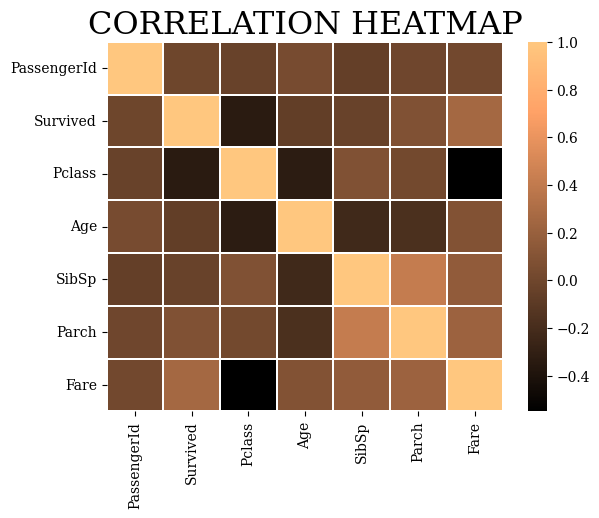

In [37]:
corr_matrix = df_new.corr()
# Set the font style to Times New Roman
plt.rcParams['font.family'] = 'serif'
sns.heatmap(corr_matrix, annot=False,cmap="copper",linewidth = .1)
plt.title('CORRELATION HEATMAP',fontsize = 23)
plt.show()

#### NEW DATA MANIPULATION

In [40]:
df = pd.read_excel("train.xlsx")

df['Survived_status']=df['Survived'].apply(lambda x: "No" if x==0 else "Yes")


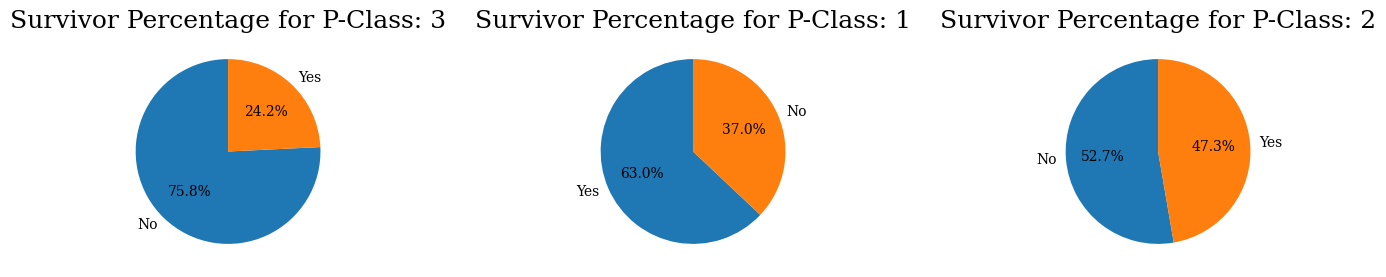

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17,3))
class_1= df.loc[(df['Pclass']==1) ,:]['Survived_status'].value_counts()
class_2= df.loc[(df['Pclass']==2) ,:]['Survived_status'].value_counts()
class_3= df.loc[(df['Pclass']==3) ,:]['Survived_status'].value_counts()
plt.rcParams['font.family'] = 'serif'
plt.subplot(1,3,1)
plt.pie(class_3.values,labels=class_3.index,autopct='%1.1f%%',startangle = 90)
plt.title("Survivor Percentage for P-Class: 3",fontsize = 18)
plt.subplot(1,3,2)
plt.pie(class_1.values,labels=class_1.index,autopct='%1.1f%%',startangle = 90)
plt.title("Survivor Percentage for P-Class: 1",fontsize = 18)
plt.subplot(1,3,3)
plt.pie(class_2.values,labels=class_2.index,autopct='%1.1f%%',startangle = 90)
plt.title("Survivor Percentage for P-Class: 2",fontsize = 18)
plt.show()

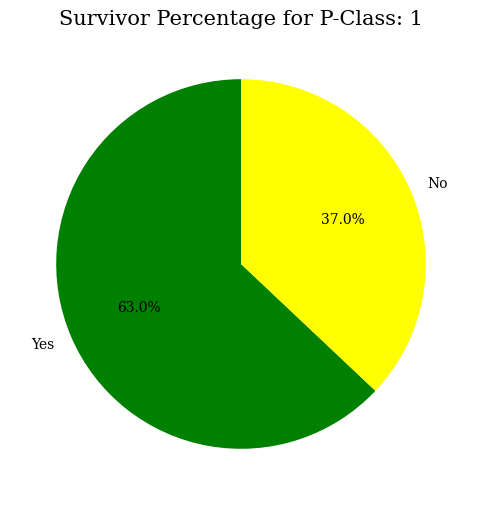

In [60]:
plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'serif'
colors = ['#008000', '#FFFF00']
plt.pie(class_1.values, labels=class_1.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Survivor Percentage for P-Class: 1",fontsize=15)
plt.show()


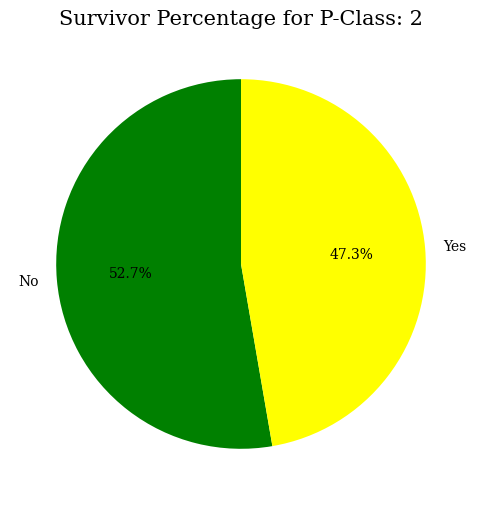

In [61]:
plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'serif'
colors = ['#008000', '#FFFF00']
plt.pie(class_2.values, labels=class_2.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Survivor Percentage for P-Class: 2",fontsize=15)
plt.show()


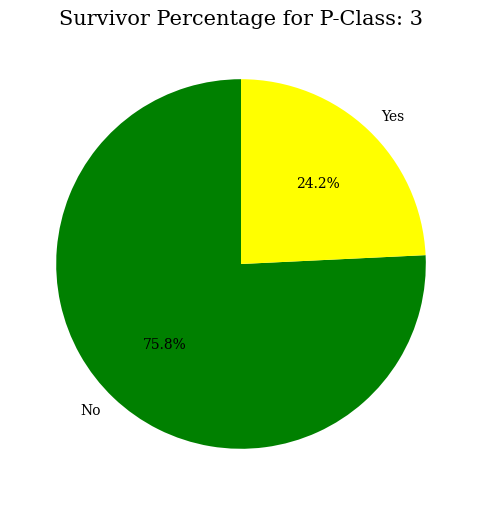

In [59]:
plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'serif'
colors = ['#008000', '#FFFF00']
plt.pie(class_3.values, labels=class_3.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Survivor Percentage for P-Class: 3",fontsize = 15)
plt.show()

### MODEL FITTING: LOGISTIC REGRESSION

In [ ]:
dff = df.copy()
dff['Sex']=dff['Sex'].apply(lambda x: 1 if x=="female" else 0)
dff['pclass=1'] = (dff['Pclass']==1).astype('int')
dff['pclass=2'] = (dff['Pclass']==2).astype('int')
dff['pclass=3'] = (dff['Pclass']==3).astype('int')
dff['Embarked=S'] = (dff['Embarked']=='S').astype('int')
dff['Embarked=C'] = (dff['Embarked']=='C').astype('int')
dff['Embarked=Q'] = (dff['Embarked']=='Q').astype('int')
dff['initials=Master'] = (dff['initials']=='Master').astype('int')
dff['initials=Mr'] = (dff['initials']=='Mr').astype('int')
dff['initials=Miss'] = (dff['initials']=='Miss').astype('int')
dff['initials=Mrs'] = (dff['initials']=='Mrs').astype('int')
dff.head(3)


dff.drop(['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Cabin','Embarked','Survived_status','initials','Surname','family_group'],axis=1,inplace=True)
dff.head()



### CHI TEST

In [68]:
from scipy.stats import chi2_contingency
def contigency_independence(d):
    if (( d.iloc[:,1:]/ d.iloc[:,1:].sum().sum() )<0.05).sum().sum()>0:
        print("Chi-Square Test can't be conducted, since one of the proportion < 5% \n")
        print("Observed Contigency Table: \n",d)
    else:
        p_val = chi2_contingency(d[d.columns[1:]])[1]
        if p_val<0.05:
            print("\nChi-Square Test for Independence, p-value : ",p_val,"< 0.05. Hence, we reject Null Hyporthesis and claim Features are independent")
        else:
            print("\nChi-Square Test for Independence, p-value : ",p_val,". Hence, we reject the Null Hypothesis and claim that, features are dependent")

In [69]:
df_pclass1 = df[df['Pclass']==1]

survivor_pclass = pd.DataFrame(df_pclass1['Survived_status'].unique(),columns=['Survived'])
survivor_pclass[['Male','female']] = None
survivor_pclass.loc[survivor_pclass['Survived']=='No','Male']=df_pclass1.loc[(df_pclass1['Survived_status']=='No') & (df_pclass1['Sex']=='male'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='No','female']=df_pclass1.loc[(df_pclass1['Survived_status']=='No') & (df_pclass1['Sex']=='female'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Male']=df_pclass1.loc[(df_pclass1['Survived_status']=='Yes') & (df_pclass1['Sex']=='male'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','female']=df_pclass1.loc[(df_pclass1['Survived_status']=='Yes') & (df_pclass1['Sex']=='female'),].shape[0]

#contigency_independence(survivor_pclass)
contigency_independence(survivor_pclass)

Chi-Square Test can't be conducted, since one of the proportion < 5% 

Observed Contigency Table: 
   Survived Male female
0      Yes   45     91
1       No   77      3


In [70]:
df_pclass2 = df[df['Pclass']==3]

survivor_pclass = pd.DataFrame(df_pclass2['Survived_status'].unique(),columns=['Survived'])
survivor_pclass[['Male','female']] = None
survivor_pclass.loc[survivor_pclass['Survived']=='No','Male']=df_pclass2.loc[(df_pclass2['Survived_status']=='No') & (df_pclass2['Sex']=='male'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='No','female']=df_pclass2.loc[(df_pclass2['Survived_status']=='No') & (df_pclass2['Sex']=='female'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Male']=df_pclass2.loc[(df_pclass2['Survived_status']=='Yes') & (df_pclass2['Sex']=='male'),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','female']=df_pclass2.loc[(df_pclass2['Survived_status']=='Yes') & (df_pclass2['Sex']=='female'),].shape[0]
contigency_independence(survivor_pclass)


Chi-Square Test for Independence, p-value :  2.52620586012811e-17 < 0.05. Hence, we reject Null Hyporthesis and claim Features are independent


In [73]:
survivor_pclass = pd.DataFrame(df['Survived_status'].unique(),columns=['Survived'])
survivor_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
survivor_pclass.loc[survivor_pclass['Survived']=='No','Pclass=1']=df.loc[(df['Survived_status']=='No') & (df['Pclass']==1),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='No','Pclass=2']=df.loc[(df['Survived_status']=='No') & (df['Pclass']==2),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='No','Pclass=3']=df.loc[(df['Survived_status']=='No') & (df['Pclass']==3),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Pclass=1']=df.loc[(df['Survived_status']=='Yes') & (df['Pclass']==1),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Pclass=2']=df.loc[(df['Survived_status']=='Yes') & (df['Pclass']==2),].shape[0]
survivor_pclass.loc[survivor_pclass['Survived']=='Yes','Pclass=3']=df.loc[(df['Survived_status']=='Yes') & (df['Pclass']==3),].shape[0]

contigency_independence(survivor_pclass)


Chi-Square Test for Independence, p-value :  4.549251711298793e-23 < 0.05. Hence, we reject Null Hyporthesis and claim Features are independent


In [74]:
survivor_gender = pd.DataFrame(df['Survived_status'].unique(),columns=['Survived'])
survivor_gender[['female','male']] = None
survivor_gender.loc[survivor_gender['Survived']=='No','female']=df.loc[(df['Survived_status']=='No') & (df['Sex']=='female'),].shape[0]
survivor_gender.loc[survivor_gender['Survived']=='No','male']=df.loc[(df['Survived_status']=='No') & (df['Sex']=='male'),].shape[0]
survivor_gender.loc[survivor_gender['Survived']=='Yes','female']=df.loc[(df['Survived_status']=='Yes') & (df['Sex']=='female'),].shape[0]
survivor_gender.loc[survivor_gender['Survived']=='Yes','male']=df.loc[(df['Survived_status']=='Yes') & (df['Sex']=='male'),].shape[0]
contigency_independence(survivor_gender)


Chi-Square Test for Independence, p-value :  1.1973570627755645e-58 < 0.05. Hence, we reject Null Hyporthesis and claim Features are independent


In [75]:
sex_pclass = pd.DataFrame(df['Sex'].unique(),columns=['Sex'])
sex_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
sex_pclass.loc[sex_pclass['Sex']=='male','Pclass=1']=df.loc[(df['Sex']=='male') & (df['Pclass']==1),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='male','Pclass=2']=df.loc[(df['Sex']=='male') & (df['Pclass']==2),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='male','Pclass=3']=df.loc[(df['Sex']=='male') & (df['Pclass']==3),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='female','Pclass=1']=df.loc[(df['Sex']=='female') & (df['Pclass']==1),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='female','Pclass=2']=df.loc[(df['Sex']=='female') & (df['Pclass']==2),].shape[0]
sex_pclass.loc[sex_pclass['Sex']=='female','Pclass=3']=df.loc[(df['Sex']=='female') & (df['Pclass']==3),].shape[0]
contigency_independence(sex_pclass)


Chi-Square Test for Independence, p-value :  0.0002063886434823315 < 0.05. Hence, we reject Null Hyporthesis and claim Features are independent


In [76]:
df_male = df.loc[df['Sex']=='male',:]
male_survivor_pclass = pd.DataFrame(df_male['Survived_status'].unique(),columns=['Survived'])
male_survivor_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='No','Pclass=1']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==1),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='No','Pclass=2']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==2),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='No','Pclass=3']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==3),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='Yes','Pclass=1']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==1),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='Yes','Pclass=2']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==2),].shape[0]
male_survivor_pclass.loc[male_survivor_pclass['Survived']=='Yes','Pclass=3']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==3),].shape[0]
contigency_independence(male_survivor_pclass)

Chi-Square Test can't be conducted, since one of the proportion < 5% 

Observed Contigency Table: 
   Survived Pclass=1 Pclass=2 Pclass=3
0       No       77       91      300
1      Yes       45       17       47


In [77]:
df_male = df.loc[df['Sex']=='female',:]
female_survivor_pclass = pd.DataFrame(df_male['Survived_status'].unique(),columns=['Survived'])
female_survivor_pclass[['Pclass=1','Pclass=2','Pclass=3']] = None
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='No','Pclass=1']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==1),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='No','Pclass=2']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==2),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='No','Pclass=3']= df_male.loc[(df_male['Survived_status']=='No') &  (df_male['Pclass']==3),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='Yes','Pclass=1']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==1),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='Yes','Pclass=2']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==2),].shape[0]
female_survivor_pclass.loc[female_survivor_pclass['Survived']=='Yes','Pclass=3']=df_male.loc[(df_male['Survived_status']=='Yes') & (df_male['Pclass']==3),].shape[0]
contigency_independence(female_survivor_pclass)

Chi-Square Test can't be conducted, since one of the proportion < 5% 

Observed Contigency Table: 
   Survived Pclass=1 Pclass=2 Pclass=3
0      Yes       91       70       72
1       No        3        6       72


### LOGISTIC REGRESSION

In [78]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
dff.insert(loc=0, column='x0', value=[1]*len(dff))
x=dff[[col for col in list(dff.columns) if col!='Survived']]

x.iloc[:,1:] = sc_x.fit_transform(x.iloc[:,1:]) 
y=dff['Survived']
x

NameError: name 'dff' is not defined

In [84]:
df_ = pd.read_excel('train.xlsx')

dff = df_.copy()


In [85]:
dff['Sex']=dff['Sex'].apply(lambda x: 1 if x=="female" else 0)
dff['pclass=1'] = (dff['Pclass']==1).astype('int')
dff['pclass=2'] = (dff['Pclass']==2).astype('int')
dff['pclass=3'] = (dff['Pclass']==3).astype('int')
dff['Embarked=S'] = (dff['Embarked']=='S').astype('int')
dff['Embarked=C'] = (dff['Embarked']=='C').astype('int')
dff['Embarked=Q'] = (dff['Embarked']=='Q').astype('int')
# dff['initials=Master'] = (dff['initials']=='Master').astype('int')
# dff['initials=Mr'] = (dff['initials']=='Mr').astype('int')
# dff['initials=Miss'] = (dff['initials']=='Miss').astype('int')
# dff['initials=Mrs'] = (dff['initials']=='Mrs').astype('int')
dff.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0


In [88]:
dff.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'pclass=1', 'pclass=2',
       'pclass=3', 'Embarked=S', 'Embarked=C', 'Embarked=Q'],
      dtype='object')

In [92]:
dff.drop(['PassengerId','Pclass','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)
dff.head()

,Survived,Sex,Age,Fare,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q
0,0,0,22.0,7.2500,0,0,1,1,0,0
1,1,1,38.0,71.2833,1,0,0,0,1,0
2,1,1,26.0,7.9250,0,0,1,1,0,0
3,1,1,35.0,53.1000,1,0,0,1,0,0
4,0,0,35.0,8.0500,0,0,1,1,0,0


In [99]:
print("Final Features considered for Model Fitting: \n",dff.columns )
d_train = dff.copy()
d_train.head(3)


Final Features considered for Model Fitting: 
 Index(['x0', 'Survived', 'Sex', 'Age', 'Fare', 'pclass=1', 'pclass=2',
       'pclass=3', 'Embarked=S', 'Embarked=C', 'Embarked=Q'],
      dtype='object')


,x0,Survived,Sex,Age,Fare,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q
0,1,0,0,22.0,7.2500,0,0,1,1,0,0
1,1,1,1,38.0,71.2833,1,0,0,0,1,0
2,1,1,1,26.0,7.9250,0,0,1,1,0,0


In [100]:
dff = dff.fillna(df_new.mean())

####  MODEL 

In [104]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
# dff.insert(loc=0, column='x0', value=[1]*len(dff))
x=dff[[col for col in list(dff.columns) if col!='Survived']]

x.iloc[:,1:] = sc_x.fit_transform(x.iloc[:,1:]) 
y=dff['Survived']
x

,x0,Sex,Age,Fare,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q
0,1,-0.737695,-0.592481,-0.502445,-0.565685,-0.510152,0.902587,0.619306,-0.482043,-0.307562
1,1,1.355574,0.638789,0.786845,1.767767,-0.510152,-1.107926,-1.614710,2.074505,-0.307562
2,1,1.355574,-0.284663,-0.488854,-0.565685,-0.510152,0.902587,0.619306,-0.482043,-0.307562
3,1,1.355574,0.407926,0.420730,1.767767,-0.510152,-1.107926,0.619306,-0.482043,-0.307562
4,1,-0.737695,0.407926,-0.486337,-0.565685,-0.510152,0.902587,0.619306,-0.482043,-0.307562
...,...,...,...,...,...,...,...,...,...,...
886,1,-0.737695,-0.207709,-0.386671,-0.565685,1.960202,-1.107926,0.619306,-0.482043,-0.307562
887,1,1.355574,-0.823344,-0.044381,1.767767,-0.510152,-1.107926,0.619306,-0.482043,-0.307562
888,1,1.355574,0.000000,-0.176263,-0.565685,-0.510152,0.902587,0.619306,-0.482043,-0.307562
889,1,-0.737695,-0.284663,-0.044381,1.767767,-0.510152,-1.107926,-1.614710,2.074505,-0.307562


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
x_train, x_cv, y_train, y_cv = train_test_split(
    x,
    y,
    test_size=0.25,
    random_state=0
)

In [106]:
model = LogisticRegression(penalty='l2', solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [107]:
y_pred = model.predict(x_cv)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [108]:
print("Accuracy of Logistic Model: ",sum([y_pred==y_cv][0].values)/len(y_cv))

Accuracy of Logistic Model:  0.7892376681614349


In [109]:
print("Overall Accuracy of Logistic Model on CV dataset: ",sum([y_pred==y_cv][0].values)/len(y_cv))
print("Overall Accuracy of Logistic Model on Train dataset: ",sum([model.predict(x_train)==y_train][0].values)/len(y_train))

Overall Accuracy of Logistic Model on CV dataset:  0.7892376681614349
Overall Accuracy of Logistic Model on Train dataset:  0.7934131736526946


In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_cv, y_pred)

true_pos_rate = len(y_pred[(y_cv==y_pred) & (y_pred==1)])/sum(y_cv==1)
true_neg_rate = len(y_pred[(y_cv==y_pred) & (y_pred==0)])/sum(y_cv==0)
false_pos_rate = len(y_pred[(y_cv!=y_pred) & (y_pred==1)])/(len(y_pred[(y_cv!=y_pred) & (y_pred==1)]) + len(y_pred[(y_cv==y_pred) & (y_pred==0)]))
false_neg_rate = len(y_pred[(y_cv!=y_pred) & (y_pred==0)])/(len(y_pred[(y_cv!=y_pred) & (y_pred==0)]) + len(y_pred[(y_cv==y_pred) & (y_pred==1)]))

In [111]:
confusion_matrix(y_cv, y_pred)

array([[115,  24],
       [ 23,  61]])

In [112]:
print(false_neg_rate, false_pos_rate, true_neg_rate, true_pos_rate)

0.27380952380952384 0.17266187050359713 0.8273381294964028 0.7261904761904762


In [113]:
from sklearn.metrics import precision_score,recall_score,f1_score

print("Recall: TP/(TP+FN) is := ",len(y_pred[(y_cv==y_pred) & (y_pred==1)])/( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==0)])))
print("Precision: TP/(TP+FP) is := ", len(y_pred[(y_cv==y_pred) & (y_pred==1)]) / ( len(y_pred[(y_cv==y_pred) & (y_pred==1)]) + len(y_pred[(y_cv!=y_pred) & (y_pred==1)]) ))
print("F1 Score: 2/(1/recall + 1/precision) is := ", 2/((1/recall_score(y_cv, y_pred)) + (1/precision_score(y_cv, y_pred))) )

Recall: TP/(TP+FN) is :=  0.7261904761904762
Precision: TP/(TP+FP) is :=  0.7176470588235294
F1 Score: 2/(1/recall + 1/precision) is :=  0.7218934911242603


### TEST

In [114]:
df_test = pd.read_excel("test.xlsx")
df_test.head(3)
df_test.isna().sum()[df_test.isna().sum()>0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [115]:


import itertools
listOLists = [df_test['Pclass'].unique(), df_test['Sex'].unique()]
sequence = pd.DataFrame(columns=['Pclass','Sex','mean_Age','median_age','% of Age missing'])
for l in itertools.product(*listOLists):
    a=df_test[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) ]['Age'].mean()
    b=df_test[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) ]['Age'].median()
    c=str((100*df_test[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) ]['Age'].isna().sum()/df_test['Age'].isna().sum())*100//1/100)+"%"
    sequence.loc[len(sequence),:] = [*list(l),a,b,c]
sequence



,Pclass,Sex,mean_Age,median_age,% of Age missing
0,3,male,24.525104,24.0,58.13%
1,3,female,23.0734,22.0,25.58%
2,2,male,30.940678,28.0,4.65%
3,2,female,24.376552,24.0,1.16%
4,1,male,40.52,42.0,8.13%
5,1,female,41.333333,41.0,2.32%


In [116]:


for l in itertools.product(*listOLists):
  df_test.loc[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) & (df_test['Age'].isnull()),'Age'] = df_test.loc[(df_test['Pclass']==l[0]) & (df_test['Sex']==l[1]) , ['Age']].median()[0]



In [117]:
#df_test['Fare'].fillna(df_test['Fare'].mean, inplace=True)
df_test.isna().sum()[df_test.isna().sum()>0]


Fare       1
Cabin    327
dtype: int64

In [118]:
df_test.loc[df_test['Fare'].isnull(),'Fare']=7.8292

In [119]:
dff_test = df_test.copy()
dff_test['Sex']=dff_test['Sex'].apply(lambda x: 1 if x=="female" else 0)
dff_test['pclass=1'] = (dff_test['Pclass']==1).astype('int')
dff_test['pclass=2'] = (dff_test['Pclass']==2).astype('int')
dff_test['pclass=3'] = (dff_test['Pclass']==3).astype('int')
dff_test['Embarked=S'] = (dff_test['Embarked']=='S').astype('int')
dff_test['Embarked=C'] = (dff_test['Embarked']=='C').astype('int')
dff_test['Embarked=Q'] = (dff_test['Embarked']=='Q').astype('int')
dff_test['initials'] = dff_test['Name'].apply(lambda x: x.split(", ")[1].split(".")[0])
dff_test['initials=Master'] = (dff_test['initials']=='Master').astype('int')
dff_test['initials=Mr'] = (dff_test['initials']=='Mr').astype('int')
dff_test['initials=Miss'] = (dff_test['initials']=='Miss').astype('int')
dff_test['initials=Mrs'] = (dff_test['initials']=='Mrs').astype('int')
dff_test.head(3),dff_test.columns

(   PassengerId  Pclass                              Name  Sex   Age  SibSp  \
 0          892       3                  Kelly, Mr. James    0  34.5      0   
 1          893       3  Wilkes, Mrs. James (Ellen Needs)    1  47.0      1   
 2          894       2         Myles, Mr. Thomas Francis    0  62.0      0   
 
    Parch  Ticket    Fare Cabin  ... pclass=2  pclass=3  Embarked=S  \
 0      0  330911  7.8292   NaN  ...        0         1           0   
 1      0  363272  7.0000   NaN  ...        0         1           1   
 2      0  240276  9.6875   NaN  ...        1         0           0   
 
    Embarked=C  Embarked=Q  initials  initials=Master initials=Mr  \
 0           0           1        Mr                0           1   
 1           0           0       Mrs                0           0   
 2           0           1        Mr                0           1   
 
    initials=Miss  initials=Mrs  
 0              0             0  
 1              0             1  
 2              

In [120]:


dff_test['family_size'] = dff_test['SibSp'] + dff_test['Parch'] +1
dff_test['family_size'] = dff_test['family_size'].apply(lambda x: 0 if x>1 else 1) 
dff_test.rename(columns = {'family_size':'isAlone'}, inplace=True)
dff_test



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,pclass=3,Embarked=S,Embarked=C,Embarked=Q,initials,initials=Master,initials=Mr,initials=Miss,initials=Mrs,isAlone
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,...,1,0,0,1,Mr,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,...,1,1,0,0,Mrs,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,...,0,0,0,1,Mr,0,1,0,0,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,...,1,1,0,0,Mr,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,...,1,1,0,0,Mrs,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,24.0,0,0,A.5. 3236,8.0500,NaN,...,1,1,0,0,Mr,0,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,...,0,0,1,0,Dona,0,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,1,1,0,0,Mr,0,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",0,24.0,0,0,359309,8.0500,NaN,...,1,1,0,0,Mr,0,1,0,0,1


In [121]:
set(dff_test.columns).difference(set(dff.columns))

{'Cabin',
 'Embarked',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'SibSp',
 'Ticket',
 'initials',
 'initials=Master',
 'initials=Miss',
 'initials=Mr',
 'initials=Mrs',
 'isAlone'}

In [122]:
dfff = dff_test.copy()
dfff.drop(['PassengerId','Pclass','Name','SibSp','initials','Parch','Cabin','Embarked', 'Ticket'],axis=1,inplace=True)
#dfff.drop(['PassengerId','Pclass','Name','SibSp','initials','Parch','Fare','Ticket','Cabin','Embarked',  'pclass=2', 'Embarked=S', 'Embarked=C', 'Embarked=Q','initials=Miss'],axis=1,inplace=True)
dfff.shape, dfff.columns

((418, 14),
 Index(['Sex', 'Age', 'Fare', 'pclass=1', 'pclass=2', 'pclass=3', 'Embarked=S',
        'Embarked=C', 'Embarked=Q', 'initials=Master', 'initials=Mr',
        'initials=Miss', 'initials=Mrs', 'isAlone'],
       dtype='object'))

In [123]:
dfff.insert(loc=0, column='x0', value=[1]*len(dfff))
dfff = dfff[[col for col in dff.columns if col !='Survived']]
dfff.columns==[col for col in dff.columns if col !='Survived']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [124]:


set(dfff.columns).difference(set(dff.columns))



set()

In [125]:


submisson_model = LogisticRegression(penalty='l2', solver='liblinear')
x = dff[[col for col in list(dff.columns) if col!='Survived']]
x.iloc[:,1:] = sc_x.fit_transform(x.iloc[:,1:]) 
y = np.array(dff['Survived'])
submisson_model.fit(x,y)



LogisticRegression(solver='liblinear')

In [126]:


x_test = dfff.copy()
y_pred = submisson_model.predict(x_test)
x_test



,x0,Sex,Age,Fare,pclass=1,pclass=2,pclass=3,Embarked=S,Embarked=C,Embarked=Q
0,1,0,34.5,7.8292,0,0,1,0,0,1
1,1,1,47.0,7.0000,0,0,1,1,0,0
2,1,0,62.0,9.6875,0,1,0,0,0,1
3,1,0,27.0,8.6625,0,0,1,1,0,0
4,1,1,22.0,12.2875,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
413,1,0,24.0,8.0500,0,0,1,1,0,0
414,1,1,39.0,108.9000,1,0,0,0,1,0
415,1,0,38.5,7.2500,0,0,1,1,0,0
416,1,0,24.0,8.0500,0,0,1,1,0,0


In [127]:
dff_test['Survived']=y_pred
y_pred.shape,dff_test.shape, dff_test.columns 
submission =dff_test.loc[:,['PassengerId','Survived']]

In [128]:
submission.to_csv('submission.csv',index=False)